In [2]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
power_data =  pd.read_csv("./zhenjiang_power.csv",)
power_data['record_date'] = pd.to_datetime(power_data['record_date'],format = '%Y-%m-%d %H:%M:%S')
power_data.head()

,user_id,record_date,power_consumption
0,1,2015-01-01,1135.0
1,1,2015-01-02,570.0
2,1,2015-01-03,3418.0
3,1,2015-01-04,3968.0
4,1,2015-01-05,3986.0


In [4]:
power_data.info() # 查看信息是否缺失

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885486 entries, 0 to 885485
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            885486 non-null  int64         
 1   record_date        885486 non-null  datetime64[ns]
 2   power_consumption  885486 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 20.3 MB


In [5]:
power_data.iloc[0].values

array([1, Timestamp('2015-01-01 00:00:00'), 1135.0], dtype=object)

<AxesSubplot:xlabel='record_date'>

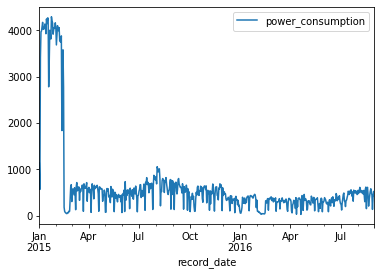

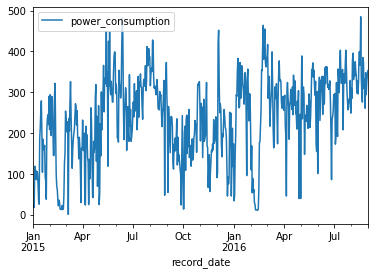

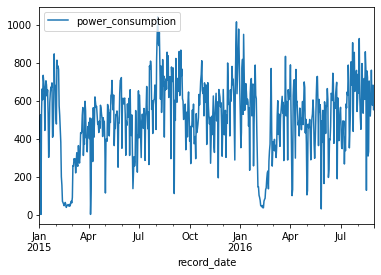

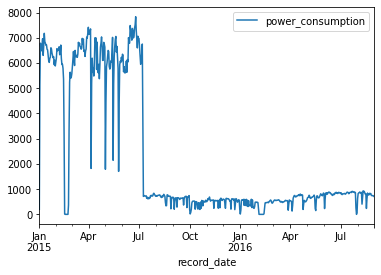

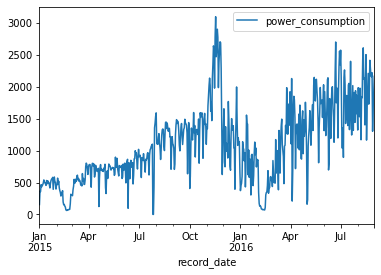

In [6]:
power_data[(power_data['user_id']==1)].plot(x='record_date',y='power_consumption')
power_data[(power_data['user_id']==2)].plot(x='record_date',y='power_consumption')
power_data[(power_data['user_id']==3)].plot(x='record_date',y='power_consumption')
power_data[(power_data['user_id']==4)].plot(x='record_date',y='power_consumption')
power_data[(power_data['user_id']==5)].plot(x='record_date',y='power_consumption')

创建透视表

In [32]:
loads_wide_df = pd.pivot_table(data=power_data,columns=['record_date'],values='power_consumption',index=['user_id'])
print(type(loads_wide_df))
loads_wide_df.head()

<class 'pandas.core.frame.DataFrame'>


record_date,2015-01-01,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-10,...,2016-08-22,2016-08-23,2016-08-24,2016-08-25,2016-08-26,2016-08-27,2016-08-28,2016-08-29,2016-08-30,2016-08-31
user_id,,,,,,,,,,,,,,,,,,,,,
1,1135.0,570.0,3418.0,3968.0,3986.0,4082.0,4172.0,4022.0,4025.0,4047.0,...,351.0,443.0,529.0,584.0,500.0,451.0,139.0,393.0,527.0,440.0
2,24.0,22.0,18.0,119.0,108.0,109.0,86.0,106.0,103.0,77.0,...,385.0,373.0,309.0,333.0,261.0,348.0,294.0,324.0,343.0,353.0
3,385.0,475.0,526.0,1.0,535.0,663.0,606.0,735.0,698.0,667.0,...,705.0,597.0,520.0,581.0,762.0,593.0,577.0,683.0,553.0,563.0
4,206.0,5134.0,6784.0,6475.0,6592.0,6742.0,6963.0,6301.0,6693.0,7176.0,...,788.0,838.0,826.0,825.0,750.0,748.0,744.0,750.0,729.0,707.0
5,156.0,368.0,359.0,467.0,433.0,452.0,467.0,495.0,542.0,502.0,...,1941.0,2417.0,2296.0,2175.0,2160.0,2222.0,1305.0,1719.0,1894.0,2166.0


In [67]:
print(loads_wide_df.index.values)

[   1    2    3 ... 1452 1453 1454]


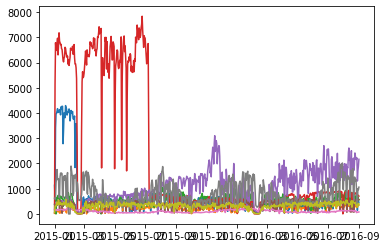

In [73]:
for label in range(1,10):
    plt.plot([date for date in loads_wide_df.columns.values] ,[power for power in loads_wide_df.loc[label]] ,label=label)
plt.show()

In [74]:
from sklearn.cluster import KMeans

In [75]:
class EnergyFingerPrints():

    def __init__(self,data):
        # 统计每个聚类簇的中心点
        self.means = []
        self.data = data

    def elbow_method(self,n_clusters):
        fig,ax=plt.subplots(figsize=(8,4))
        distortions = []

        for i in range(1, n_clusters):
            km = KMeans(n_clusters = i,
                        init='k-means++', #初始中心簇的获取方式，k-means++一种比较快的收敛的方法
                        n_init=10,        #初始中心簇的迭代次数
                        max_iter=300,     #数据分类的迭代次数
                        random_state=0)   #初始化中心簇的方式
            km.fit(self.data)
            distortions.append(km.inertia_) #inertia计算样本点到最近的中心点的距离之和

        plt.plot(range(1,n_clusters), distortions, marker='o',lw=1)
        plt.xlabel('聚类数量')
        plt.ylabel('至中心点距离之和')
        plt.show()

    def get_cluster_counts(self): #统计聚类簇和每个簇中样本的数量
        return pd.Series(self.predictions).value_counts()

    def labels(self,n_clusters): #确定每簇中样本的具体划分
        self.n_clusters = n_clusters
        return KMeans(self.n_clusters, init='k-means++', n_init=10,max_iter=300,random_state=0).fit(self.data).labels_

    def fit(self,n_clusters): #基于划分簇的数量，对数据进行聚类分析
        self.n_clusters = n_clusters
        self.kmeans = KMeans(self.n_clusters)
        self.predictions = self.kmeans.fit_predict(self.data)

    def plot(self): #分别绘制各簇中的用户用电行为曲线，并绘制各簇的平均用电行为曲线
        self.cluster_names = [str(x) for x in range(self.n_clusters)]
        fig,ax=plt.subplots(figsize=(12,16))
        for i in range(0,self.n_clusters):
            all_data = []
            for x,y in zip(self.data,self.predictions):
                    if y == i:
                        all_data.append(x)
                        plt.subplot(4,1,i+1)
                        plt.plot(x,alpha=0.006,color="blue")
                        #plt.ylim(0,4)
                        plt.xlim(0,96)
                        plt.title('Cluster {}'.format(i+1))
                        plt.ylabel('用电量/kW')

            all_data_array = np.array(all_data)
            mean = all_data_array.mean(axis=0)
            self.means.append(mean)
            plt.plot(mean, color="black",linewidth=4)

        plt.show()

    def plot_energy_fingerprints(self): #将各簇的用电行为数据绘制在一张表上
        fig,ax=plt.subplots(figsize=(8,5))

        for i,item in enumerate(self.means):
            plt.plot(item, label = "cluster %s"%(str(i+1)))
            plt.xlim(0,96)
        plt.ylabel('用电量/kW')
        plt.legend()
        plt.show()

In [95]:
load_data=np.array(loads_wide_df)

In [96]:
energy_clusters = EnergyFingerPrints(load_data)

In [97]:

from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

D:\AllCodeProjects\pycharmProjects\CondaSklearnEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


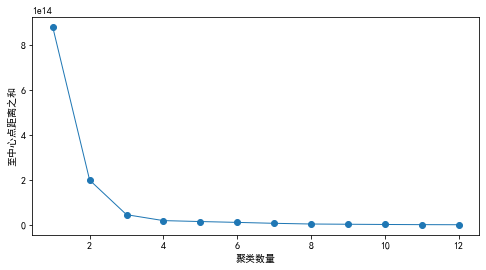

In [98]:
energy_clusters.elbow_method(n_clusters=13)

In [121]:
energy_clusters.fit(n_clusters = 4)

In [122]:
energy_clusters.get_cluster_counts()

0    1446
3       5
2       2
1       1
dtype: int64

In [123]:
group=energy_clusters.labels(n_clusters = 4)

In [124]:
num=loads_wide_df.index

In [125]:
cls=pd.DataFrame(list(num))
cls['cluster']=list(group)
cls.columns=['user_id','cluster']

In [126]:
cls=cls.sort_values(by='cluster',ascending=True)
cls.reset_index(drop=True)

,user_id,cluster
0,1,0
1,971,0
2,970,0
3,969,0
4,968,0
...,...,...
1449,90,3
1450,1310,3
1451,129,3
1452,1262,3


In [127]:
#获得属于第一分类簇的用户id
np.array(cls.loc[cls.cluster ==0].user_id)

array([  1, 971, 970, ..., 486, 485, 484], dtype=int64)

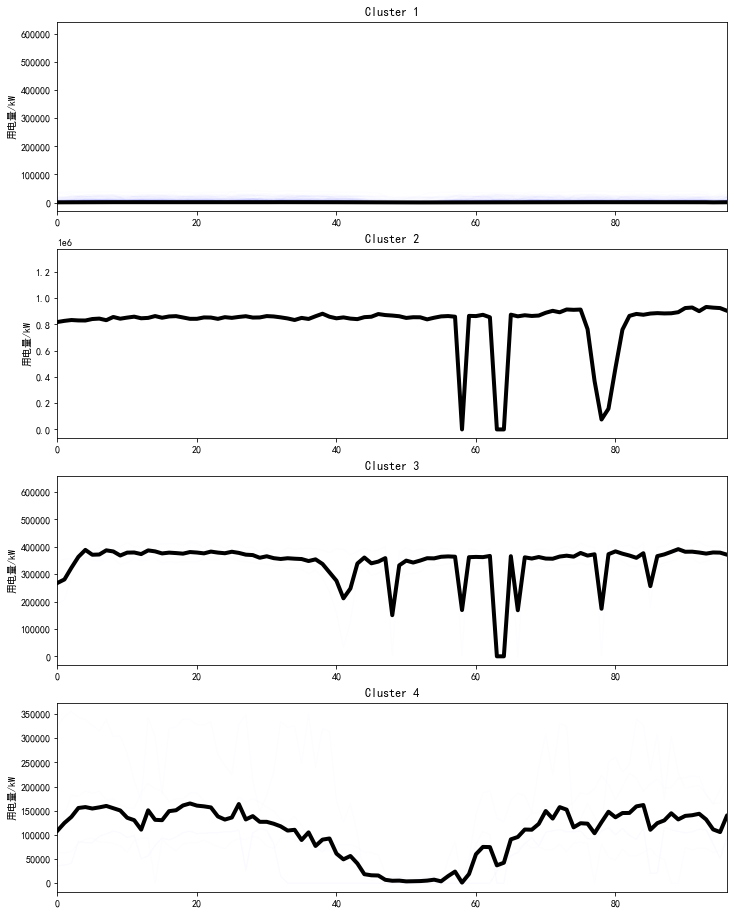

In [128]:
energy_clusters.plot()

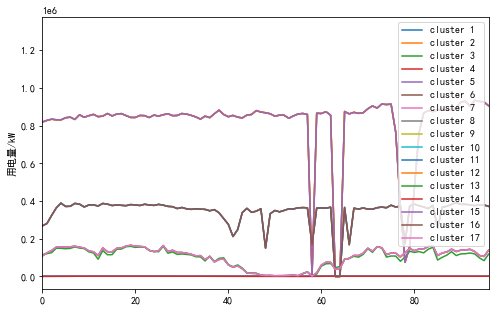

In [129]:
energy_clusters.plot_energy_fingerprints()